In [1]:
%matplotlib inline


# Generalized Linear Model


## Poisson Regression
Poisson Regression involves regression models in which the response variable is in the form of counts.
For example, the count of number of car accidents or number of customers in line at a reception desk.
The response variables is assumed to follow a Poisson distribution.

The general mathematical equation for Poisson regression is

\begin{align}\log(E(y)) = \beta_0 + \beta_1 X_1+\beta_2 X_2+\dots+\beta_p X_p.\end{align}

With $n$ independent data of the explanatory variables $x$ and the response variable $y$, we can estimate $\beta$ by minimizing the negative log-likelihood function under sparsity constraint:
$$
\arg \min _{\beta \in R^p} L(\beta):=-\frac{1}{n} \sum_{i=1}^n\left\{y_i x_i^T \beta-\exp \left(x_i^T \beta\right)-\log  \left(y!\right)\right\}, \text { s.t. }\|\beta\|_0 \leq s .
$$

Here is Python code for solving sparse poisson regression problem:

### Import necessary packages

In [2]:
import numpy as np
from abess.datasets import make_glm_data
import jax.numpy as jnp
from scope import ScopeSolver

### Generate the data

In [3]:
np.random.seed(1)

n = 500
p = 500
s = 17

data = make_glm_data(n=n, p=p, k=s, family="poisson")
X = data.x
y = data.y

### Define function to calculate negative log-likelihood of poisson regression to serve as the loss to solve


In [4]:
def poisson_loss(params):
    xbeta = jnp.clip(X @ params, -30, 30)
    return jnp.mean(jnp.exp(xbeta) - y * xbeta) #omit \log y! term

### Use scope to solve the sparse possion regression problem

In [5]:
solver = ScopeSolver(p, s)
solver.solve(poisson_loss, jit=True)

print("True support set: ", np.nonzero(data.coef_)[0])
#print("True parameters: ", data.coef_)
#print("True loss value: ", poisson_loss(data.coef_))
print("Estimated support set: ", np.sort(solver.support_set))
#print("Estimated parameters: ", solver.params)
print("Estimated loss value: ", poisson_loss(solver.params))

True support set:  [  4  43  57  78  82 189 192 225 234 257 258 268 360 411 416 433 435]
Estimated support set:  [ 43  57  78  82 189 192 206 234 257 258 268 360 411 416 433 435 488]
Estimated loss value:  -0.5718817


## More on the results

We can plot the sparse signal recovering from the noisy observations to visualize the results.

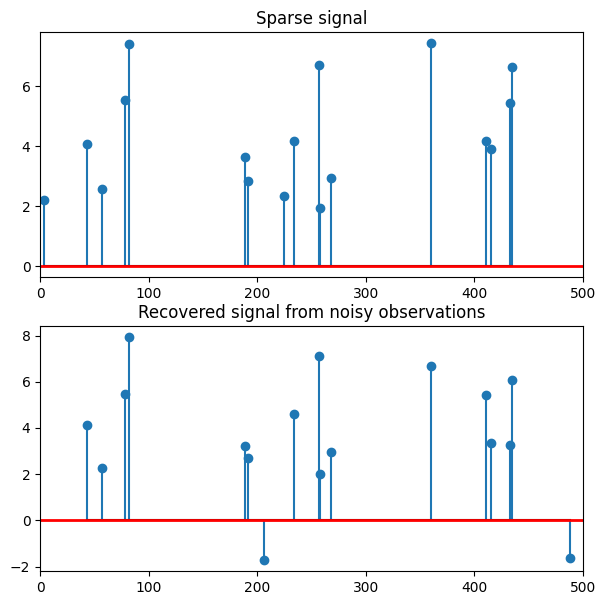

In [6]:
import matplotlib.pyplot as plt
(inx_true,) =  data.coef_.nonzero()
(inx_est,) =  solver.params.nonzero()

# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(2, 1, 1)
plt.stem(inx_true, data.coef_[inx_true], markerfmt='o', basefmt='k-')
plt.plot([0, 500], [0, 0], 'r-', lw=2)
plt.xlim(0, 500)
plt.title("Sparse signal")
#plt.plot(inx_true, true_params[inx_true], drawstyle='steps-post')

# plot the noisy reconstruction
plt.subplot(2, 1, 2)
plt.stem(inx_est, solver.params[inx_est], markerfmt='o', basefmt='k-')
plt.plot([0, 500], [0, 0], 'r-', lw=2)
plt.xlim(0, 500)
plt.title("Recovered signal from noisy observations")
#plt.plot(inx_est, solver.params[inx_est], drawstyle='steps-post')

plt.show()